# Analyse Image Compteur

In [1]:
# Import des modules
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from scipy import signal
from skimage import color, measure, morphology, filters

In [32]:
def get_image_at_correct_shape(image):
    color_shape_length = image.shape[2]
    assert color_shape_length >= 3, "Image must have at least 3 channels"
    if color_shape_length > 3:
        image = image[:,:,:3]
    return image
    
def get_binaried_image(image, threshold):
    image = get_image_at_correct_shape(image)
    image = color.rgb2gray(image)
    image = image > threshold
    
    return image

def get_image_with_biggest_object(bin_image):
    labels = measure.label(bin_image)
    regions = measure.regionprops(labels)
    idx_max_area = max(enumerate(regions), key=lambda x: x[1].area)[0] + 1
    return np.isin(labels, idx_max_area)

def get_smoothed_image(image, sigma):
    image = morphology.dilation(image, morphology.disk(sigma))
    image = morphology.erosion(image, morphology.disk(sigma))
    return image

def get_binaried_number_image(image, threshold, sigma):
    bin_image = get_binaried_image(image, threshold)
    bin_image = get_image_with_biggest_object(bin_image)
    bin_image = get_smoothed_image(bin_image, sigma)
    return bin_image

def get_number_from_image(number_bin_image):
    correlation_factors = np.zeros(10)
    for i in range(10):
        h = plt.imread(f'./img/ocr/bin{i}.png').copy()
        h = get_binaried_image(h, 0.5).astype(int)

        I = signal.correlate2d(number_bin_image, h, mode='same')

        correlation_factors[i] = np.max(I)
    
    return np.argmax(correlation_factors)




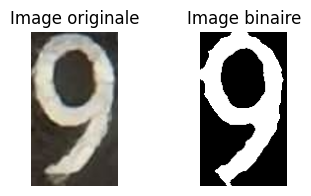

In [94]:
I0 = plt.imread('../img/9.png').copy()

threshold = 0.31  # filters.threshold_otsu(I0_threshold)
I0_binary = get_binaried_image(I0, threshold)
I0_binary = get_image_with_biggest_object(I0_binary)
I0_binary = get_smoothed_image(I0_binary, 2)

fig, axs = plt.subplots(1, 2, figsize=(4, 2))

axs[0].imshow(I0, cmap='gray')
axs[0].set_title('Image originale')

axs[1].imshow(I0_binary, cmap='gray')
axs[1].set_title('Image binaire')

for ax in axs.flat:
    ax.axis('off')

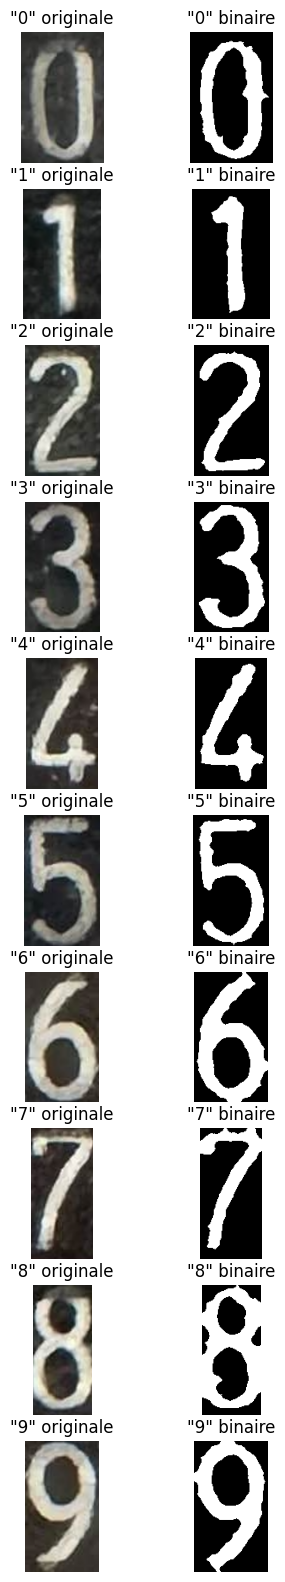

In [96]:
threshold = 0.31  # filters.threshold_otsu(I0_threshold)

thresholds = [0.31, 0.29, 0.35, 0.23, 0.30, 0.32, 0.31, 0.29, 0.25, 0.31]

fig, axs = plt.subplots(10, 2, figsize=(4, 20))

for i in range(10):
    I = plt.imread(f'../img/{i}.png').copy()
    I_binary = get_binaried_number_image(I, thresholds[i], 2)

    plt.imsave(f'../img/bin{i}.png', I_binary, cmap='gray') # Save the image

    axs[i][0].imshow(I, cmap='gray')
    axs[i][0].set_title(f'"{i}" originale')

    axs[i][1].imshow(I_binary, cmap='gray')
    axs[i][1].set_title(f'"{i}" binaire')

for ax in axs.flat:
    ax.axis('off')

In [97]:
threshold = 0.5  # filters.threshold_otsu(I0_threshold)

for j in range(10):
    Image = plt.imread(f'../img/{j}.png').copy()
    binaried_Image = get_binaried_image(Image, threshold)

    correlation_factors = np.zeros(10)

    for i in range(10):
        h = plt.imread(f'../img/{i}.png').copy()
        h = get_binaried_image(h, threshold).astype(int)

        I = signal.correlate2d(binaried_Image, h, mode='same')

        correlation_factors[i] = np.max(I)
    
    print(f"{j} : {correlation_factors} -> {np.argmax(correlation_factors)}")

[4666. 2422. 2120. 2619. 1712. 2386. 3006. 1249. 2910. 3065.] 0
0 : [4666. 2422. 2120. 2619. 1712. 2386. 3006. 1249. 2910. 3065.] -> 0
[2422. 3697. 1695. 2193. 1717. 1651. 1965. 1409. 1993. 2132.] 1
1 : [2422. 3697. 1695. 2193. 1717. 1651. 1965. 1409. 1993. 2132.] -> 1
[2120. 1695. 4427. 2470. 2709. 1856. 2227. 2043. 2141. 2428.] 2
2 : [2120. 1695. 4427. 2470. 2709. 1856. 2227. 2043. 2141. 2428.] -> 2
[2619. 2193. 2470. 3859. 1808. 2501. 2444. 1419. 2661. 2182.] 3
3 : [2619. 2193. 2470. 3859. 1808. 2501. 2444. 1419. 2661. 2182.] -> 3
[1712. 1717. 2709. 1808. 3870. 1818. 2368. 2029. 2123. 2215.] 4
4 : [1712. 1717. 2709. 1808. 3870. 1818. 2368. 2029. 2123. 2215.] -> 4
[2386. 1651. 1856. 2501. 1818. 4303. 3138. 1108. 2179. 2477.] 5
5 : [2386. 1651. 1856. 2501. 1818. 4303. 3138. 1108. 2179. 2477.] -> 5
[3006. 1965. 2227. 2444. 2368. 3138. 5514. 1879. 3404. 3758.] 6
6 : [3006. 1965. 2227. 2444. 2368. 3138. 5514. 1879. 3404. 3758.] -> 6
[1188. 1409. 2043. 1419. 2029. 1108. 1879. 2805. 1476. 

In [ ]:
threshold = 0.5  # filters.threshold_otsu(I0_threshold)

Image = plt.imread(f'../img/3bis.png').copy()
binaried_Image = get_binaried_image(Image, threshold)

correlation_factors = np.zeros(9)

for i in range(10): 
    h = plt.imread(f'../img/{i}.png').copy()
    h = get_binaried_image(h, threshold).astype(int)

    I = signal.correlate2d(binaried_Image, h, mode='same')

    correlation_factors[i] = np.max(I)

print(correlation_factors, np.argmax(correlation_factors))

[1174. 1183.  987. 1001. 1089.  962. 1187.  799. 1240.] 8


In [93]:
# Générer l'image du 9 avec celle du 6

Image6 = plt.imread(f'../img/6.png').copy()
Image9 = cv.flip(Image6, -1)

plt.imsave(f'../img/9.png', Image9)

(np.float64(-0.5), np.float64(215.5), np.float64(40.5), np.float64(-0.5))

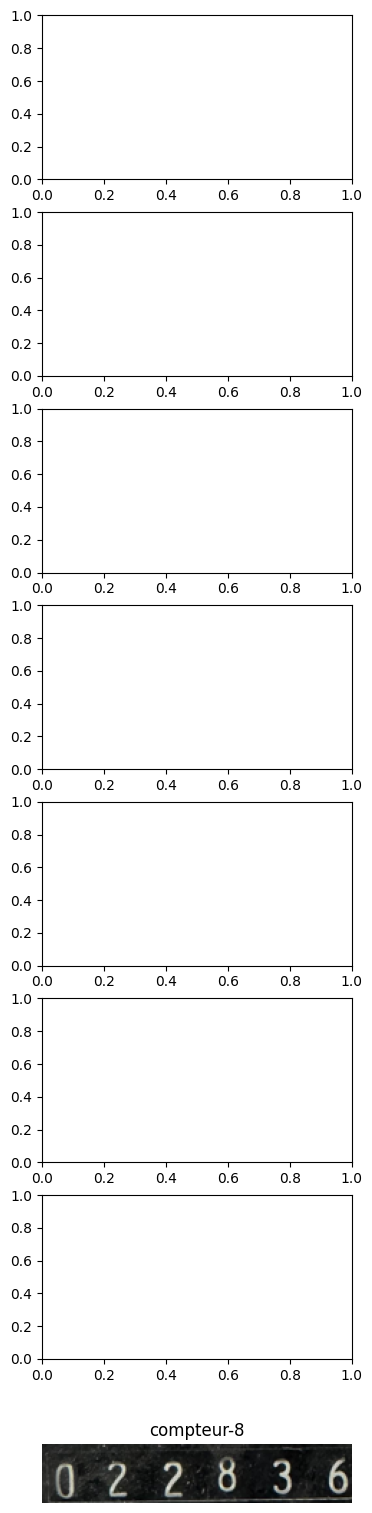

In [ ]:

fig, axs = plt.subplots(8, 6, figsize=(4, 20))

for i in range(8):
  I = plt.imread(f'./img/data/{i+1}.png').copy()
  bin_I = get_binaried_image(I, 0.38)
  labels = measure.label(bin_I)
  regions = measure.regionprops(labels)
  sorted_regions = sorted(regions, key=lambda r: r.area, reverse=True)[:6]
  sorted_regions = sorted(sorted_regions, key=lambda r: r.centroid[1])
  numbers_labels = {region.label for region in sorted_regions}
  filtered_I = np.isin(labels, list(numbers_labels))

  nombre_final = 0
  for j, region in enumerate(sorted_regions):
    minr, minc, maxr, maxc = region.bbox
    digit_image = bin_I[minr:maxr, minc:maxc]
    axs[i][j].imshow(digit_image, cmap='gray')
    
  print(nombre_final)
    

# axs[i].imshow(I, cmap='gray')
# axs[i].set_title(f'compteur-{i+1}')
# axs[i].axis('off')
plt.show()